In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from termcolor import colored

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Model
# --------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

# Load Data

In [6]:
data = pd.read_csv('./data_i.csv')
data.head(4)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,First_Protocol_TCP,First_Protocol_UDP,Type_mine,Type_not_mine,Cryptocurrency_Bitcash,Cryptocurrency_Bitcoin,Cryptocurrency_Does not have,Cryptocurrency_Etherium,Cryptocurrency_Litecoin,Cryptocurrency_Monero
0,1.575318,-0.700949,-0.804477,-0.909496,0.054551,-0.864733,-0.625504,0.570941,1.236305,1.285332,...,1,0,0,1,0,0,1,0,0,0
1,-0.272723,-0.700949,-0.804477,-0.960618,-0.488545,-1.268557,-0.625504,-0.368003,-0.359170,-0.336093,...,0,1,0,1,0,0,1,0,0,0
2,0.473802,-0.159640,-0.240996,-0.196315,2.054728,-0.241926,-0.625504,-0.241532,-0.353254,-0.252227,...,1,0,0,1,0,0,1,0,0,0
3,-0.486762,-0.569563,-0.669158,0.418280,-0.420426,0.234577,-0.625504,-0.367723,-0.362821,-0.392005,...,1,0,1,0,0,1,0,0,0,0


In [7]:
data.shape

(4733, 38)

# Árboles de decisión

In [8]:
data.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'first_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib',
       'p3_ib', 'second_sp', 'second_dp', 'third_sp', 'third_dp',
       'First_Protocol_ICMP', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Type_mine', 'Type_not_mine',
       'Cryptocurrency_Bitcash', 'Cryptocurrency_Bitcoin',
       'Cryptocurrency_Does not have', 'Cryptocurrency_Etherium',
       'Cryptocurrency_Litecoin', 'Cryptocurrency_Monero'],
      dtype='object')

In [9]:
data.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'first_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib',
       'p3_ib', 'second_sp', 'second_dp', 'third_sp', 'third_dp',
       'First_Protocol_ICMP', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Type_mine', 'Type_not_mine',
       'Cryptocurrency_Bitcash', 'Cryptocurrency_Bitcoin',
       'Cryptocurrency_Does not have', 'Cryptocurrency_Etherium',
       'Cryptocurrency_Litecoin', 'Cryptocurrency_Monero'],
      dtype='object')

In [10]:
Feature_Selection = ['p1_d', 'p2_d','min_d','#sp','#dp','first_sp', 'first_dp', 'second_sp','second_dp']

In [11]:
X = data[Feature_Selection]
y = data['Type_mine']

### Holdout

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 1234)

In [13]:
model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=5,      
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=None,  
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None)

In [14]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Profundidad del árbol: 4
Número de nodos terminales: 5


[Text(159.42857142857142, 489.24, 'first_sp <= -0.413\nsamples = 3313\nvalue = [1738, 1575]\nclass = T'),
 Text(79.71428571428571, 380.52000000000004, 'samples = 1711\nvalue = [1711, 0]\nclass = T'),
 Text(239.1428571428571, 380.52000000000004, 'second_sp <= -0.755\nsamples = 1602\nvalue = [27, 1575]\nclass = i'),
 Text(159.42857142857142, 271.8, 'samples = 23\nvalue = [23, 0]\nclass = T'),
 Text(318.85714285714283, 271.8, 'first_dp <= -0.4\nsamples = 1579\nvalue = [4, 1575]\nclass = i'),
 Text(239.1428571428571, 163.08000000000004, 'samples = 3\nvalue = [3, 0]\nclass = T'),
 Text(398.57142857142856, 163.08000000000004, '#sp <= -0.501\nsamples = 1576\nvalue = [1, 1575]\nclass = i'),
 Text(318.85714285714283, 54.360000000000014, 'samples = 1575\nvalue = [0, 1575]\nclass = i'),
 Text(478.2857142857142, 54.360000000000014, 'samples = 1\nvalue = [1, 0]\nclass = T')]

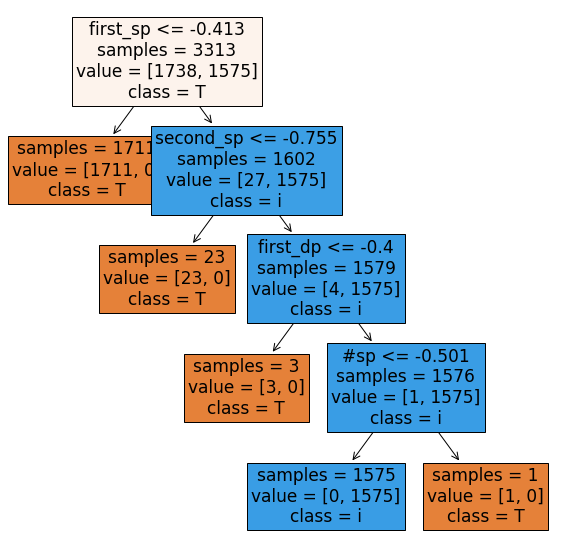

In [15]:
fig, ax = plt.subplots(figsize = (10,10))

print(colored(f'Profundidad del árbol: {model.get_depth()}', attrs=['bold']))
print(colored(f'Número de nodos terminales: {model.get_n_leaves()}', attrs=['bold']))


plot_tree(
    decision_tree = model,
    feature_names = X_train.columns.tolist(),
    class_names   = 'Tipo de trafico minero',
    filled        = True,
    impurity      = False,
    fontsize      = 17,
    ax            = ax
)

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [17]:
len(y_pred[y_pred == 0])

763

In [18]:
len(y_pred[y_pred == 1])

657

# Métricas y matriz de confusión

([<matplotlib.axis.YTick at 0x216517e1198>,
 <a list of 2 Text yticklabel objects>)

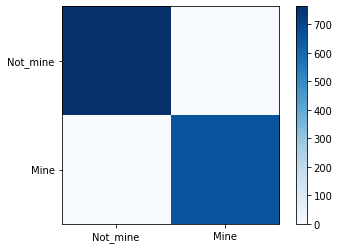

In [19]:
churm = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [20]:
pd.DataFrame(churm)

,0,1
0,763,0
1,0,657


In [21]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa: ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  1.0
Kappa:  1.0


In [22]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))

VP = np.sum(churm[1:2,1:2])
FN = np.sum(churm[1,0:1])
specificity = VP/(VP+FN)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))

Precisión     :  1.0
Recall        :  1.0
Especificidad :  1.0
F1-score      :  1.0


In [23]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))

VP = np.sum(churm[0:1,0:1])
FN = np.sum(churm[0,1:2])
specificity = VP/(VP+FN)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))

Precisión     :  1.0
Recall        :  1.0
Especificidad :  1.0
F1-score      :  1.0


In [24]:
y_pred_proba = model.predict_proba(X_test)

In [25]:
lr_probs = y_pred_proba[:,1]

In [26]:
ns_probs = [0 for _ in range(len(y_test))]

In [27]:
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
ns_auc

0.5

In [28]:
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
lr_auc

1.0

In [29]:
#Sumo los scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Treeb: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Treeb: ROC AUC=1.000


In [30]:
ns_fpr, ns_tpr, thresholds  = metrics.roc_curve(y_test,ns_probs)
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, lr_probs)

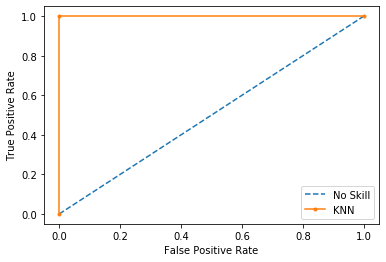

In [31]:
#Plot la roc curva para el modelo
plt.plot(ns_fpr,ns_tpr,linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Holdaunt 70% pero debo hacer una validadci{on cruzada en este conjunto de entrenamiento (Puros), de este cruz validation saldra un modelo, y lo testeo con el 30%, con este porcentaje, le saco las metricas

# Exprimento 1

In [32]:
data_N = pd.read_csv('./data_no_identificada.csv')
data_N.columns

Index(['index', 'Name', 'Netflows', 'First_Protocol', 'Second_Protocol',
       'Third_Protocol', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'Type', 'Cryptocurrency'],
      dtype='object')

In [33]:
Feature_Selection =['p1_d', 'p2_d', 'min_d', '#sp', '#dp', 'first_sp', 'first_dp', 'second_sp', 'second_dp','Type']

In [34]:
temp = data_N[Feature_Selection]

In [35]:
temp = temp.dropna()

In [36]:
temp.isnull().sum()

p1_d         0
p2_d         0
min_d        0
#sp          0
#dp          0
first_sp     0
first_dp     0
second_sp    0
second_dp    0
Type         0
dtype: int64

In [37]:
y_predN = model.predict(temp.drop('Type', axis = 1))
y_predN

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
len(y_predN[y_predN == 0])

31998

In [39]:
len(y_predN[y_predN == 1])

0

In [40]:
y_tesN = temp['Type'].replace({'mine':1,'not_mine':0})

([<matplotlib.axis.YTick at 0x21651f3e710>,
 <a list of 2 Text yticklabel objects>)

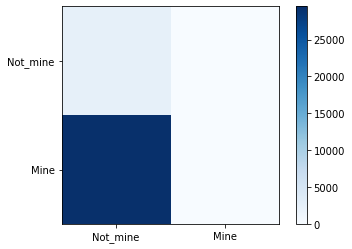

In [41]:
churm = metrics.confusion_matrix(y_tesN, y_predN)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [42]:
pd.DataFrame(churm)

,0,1
0,2498,0
1,29500,0


In [43]:
print("Exactitud: ", metrics.accuracy_score(y_tesN, y_predN))
print("Kappa: ", metrics.cohen_kappa_score(y_tesN, y_predN))

Exactitud:  0.0780673792112007
Kappa:  0.0


In [44]:
print("Precisión     : ", metrics.precision_score(y_tesN, y_predN, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_tesN, y_predN, labels=[1], average='macro'))

VP = np.sum(churm[1:2,1:2])
FN = np.sum(churm[1,0:1])
specificity = VP/(VP+FN)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_tesN, y_predN, labels=[1], average='macro'))

Precisión     :  0.0
Recall        :  0.0
Especificidad :  0.0
F1-score      :  0.0


C:\Users\S T E V E N\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
print("Precisión     : ", metrics.precision_score(y_tesN, y_predN, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_tesN, y_predN, labels=[0], average='macro'))

VP = np.sum(churm[0:1,0:1])
FN = np.sum(churm[0,1:2])
specificity = VP/(VP+FN)
print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_tesN, y_predN, labels=[0], average='macro'))

Precisión     :  0.0780673792112007
Recall        :  1.0
Especificidad :  1.0
F1-score      :  0.14482838589981448
